## QUESTION1
### Scipy:
#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
### Task:
#### 1.fitting it to the periodic function
#### 2.plot the fit
### Data
#### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month=np.arange(0,12)

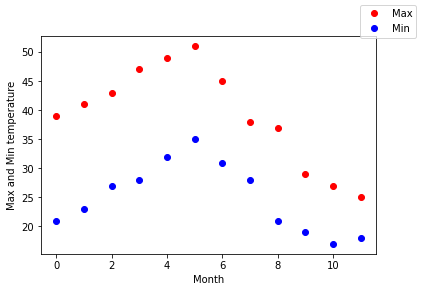

In [3]:
fig, ax= plt.subplots()
ax.plot(month,temp_max, "ro" )
ax.plot(month,temp_min, "bo")
ax.set_xlabel("Month")
ax.set_ylabel("Max and Min temperature")
fig.legend(["Max","Min"])

## 1. Fitting it to the periodic function

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, month,temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, month,temp_min, [-40, 20, 0])

## 2.Plotting the curve

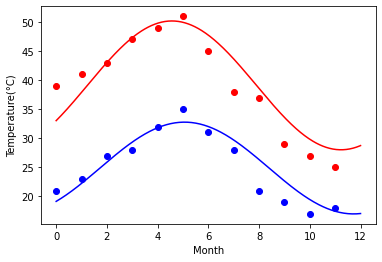

In [5]:
days=np.linspace(0,12,365)
fig, ax= plt.subplots()
ax.plot(month,temp_max, "ro" )
ax.plot(days, yearly_temps(days, *res_max), 'r-')
ax.plot(month,temp_min, "bo")
ax.plot(days, yearly_temps(days, *res_min), 'b-')
ax.set_xlabel("Month")
ax.set_ylabel("Temperature(°C)")
plt.show()


## QUESTION2

### Matplotlib:
#### This assignment is for visualization using matplotlib: 
#### 1. Create a pie chart presenting the male/female proportion
#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
titanic.shape

(1310, 14)

In [9]:
df=titanic.iloc[:-1,:]
df.shape

(1309, 14)

In [10]:
SexType=df['sex'].value_counts()

In [11]:
SexType

male      843
female    466
Name: sex, dtype: int64

Text(0.5, 1.0, 'Male/Female Proportion')

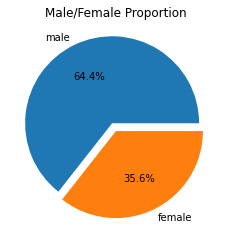

In [12]:
fig, ax = plt.subplots()
ax.pie(SexType.values.tolist(), labels=SexType.index.values.tolist(),autopct="%0.1f%%",explode=[0.1,0])
ax.set_title('Male/Female Proportion')

In [13]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare Vs Age')

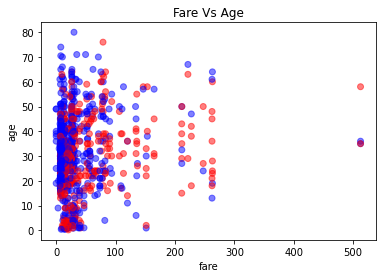

In [14]:
fig,ax= plt.subplots()
mapping={'male':'blue','female':'red'}
ax.scatter(df['fare'],df['age'],alpha=0.5,c=df['sex'].map(mapping))
ax.set_xlabel("fare")
ax.set_ylabel('age')
ax.set_title('Fare Vs Age')